In [0]:
import matplotlib.pyplot as plt
import numpy as np

def plot_grid(narr):
    if narr.dtype != 'bool':
        raise ValueError('narr should be a boolean ndarray')
    colors = np.empty(narr.shape, dtype='U5')
    colors[:] = 'red'
    colors[narr] = 'black'
    x, y = np.indices((narr.shape))
    plt.scatter(x, y, c=colors.ravel())
    plt.show()

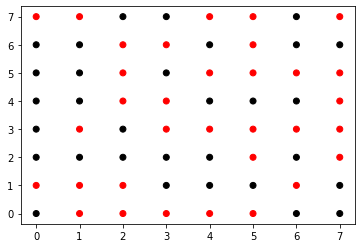

In [7]:
size = 8
narr = np.random.choice([0, 1], size=size**2).reshape((size, size)).astype('bool')

plot_grid(narr)

In [0]:
def metroplis(start, value, proposal, niter, nburn=0, **kwargs):
    current = start
    post = [0]
    for i in range(niter):
        p = value(current, **kwargs)
        index = np.random.choice(8,2)
        proposed = proposal(current, index, **kwargs)
        p /= value(proposed, **kwargs)
        if np.random.uniform() > p:
            current = proposed
        else:
            current[index[0]][index[1]] = 0;
        post.append(int(np.sum(current)))
    plot_grid(current.astype('bool'))
    return post[nburn:]

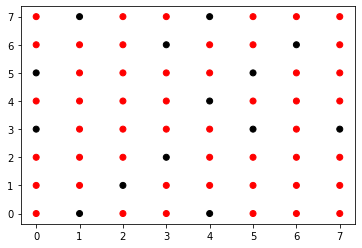

In [9]:
def value(current, **kwargs):
    _ = kwargs
    return current.sum()


def proposal(current, i, **kwargs):
    _ = kwargs
    i = np.random.choice(8,2)
    
    s=0
    if i[0]!=0:
        s+=current[i[0]-1][i[1]]
    if i[0]!=7:
        s+=current[i[0]+1][i[1]]
    if i[1]!=0:
        s+=current[i[0]][i[1]-1]
    if i[1]!=7:
        s+=current[i[0]][i[1]+1]
    
    if s==0:
        current[i[0]][i[1]] = 1
    else:
        current[i[0]][i[1]] = 0
    return current

size = 8

post = metroplis(np.zeros((8,8)), value, proposal, 100000)

In [10]:
print("Найдем среднее число закрашенных вершин:",sum(post)/len(post))

Найдем среднее число закрашенных вершин: 15.316956830431696


In [0]:
#Проверим стационарность 

Ttest_indResult(statistic=-7.458634856898784, pvalue=1.4285676583033586e-13)

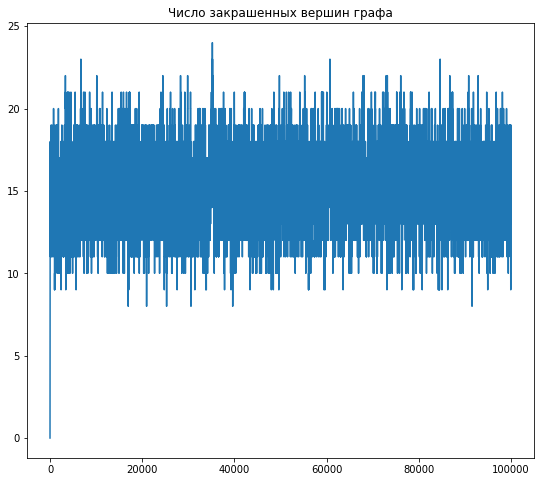

In [12]:
from scipy import stats
def g_test(x, start=0.1, end=0.1):
    return stats.ttest_ind(x[:int(len(x) * start)], x[-int(len(x) * end):], equal_var=False)

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(post)
plt.title("Число закрашенных вершин графа")
g_test(post[2010:10000])

In [0]:
#Построим распределение 

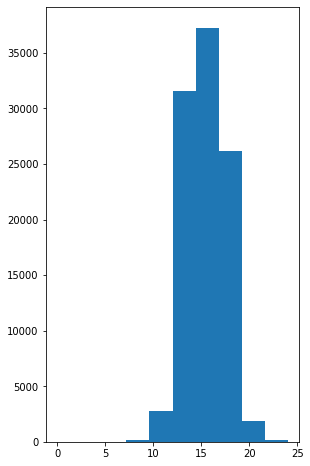

In [14]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,2)
plt.hist(post)
plt.show()